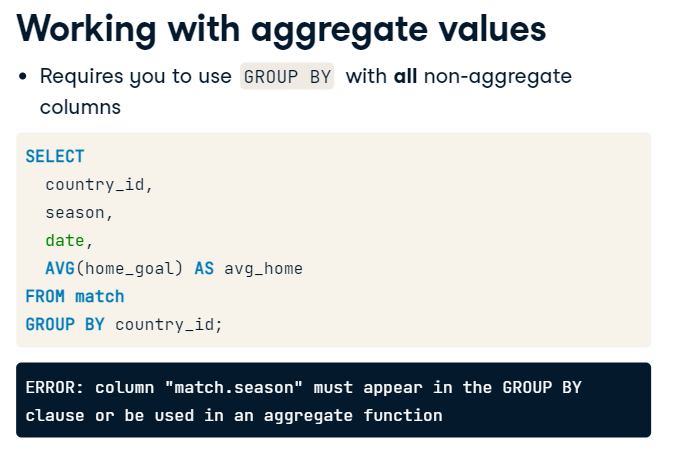
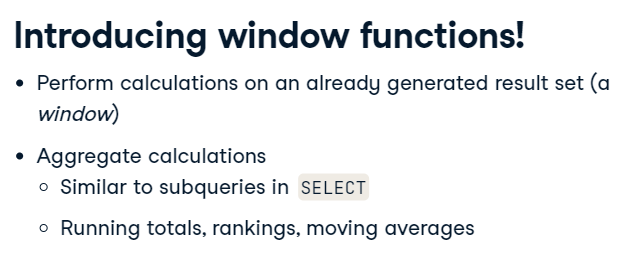
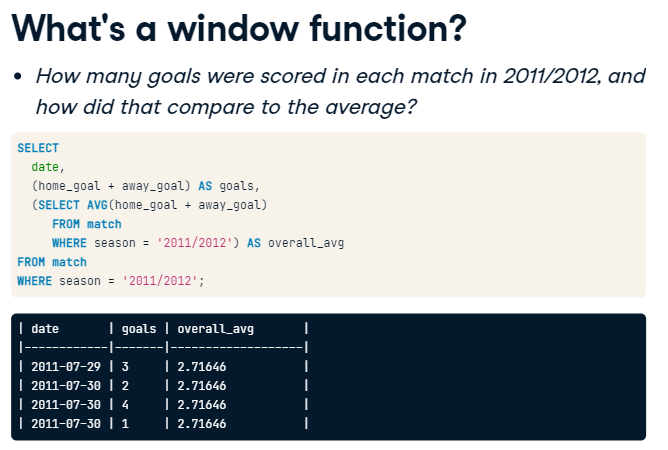
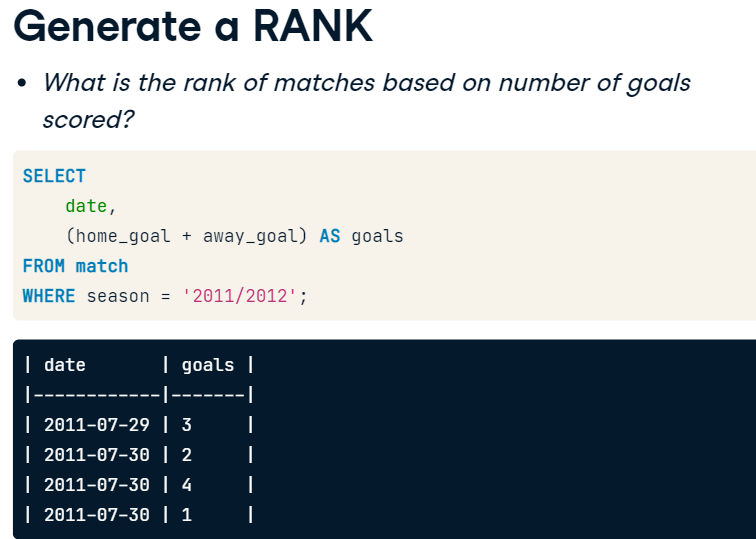
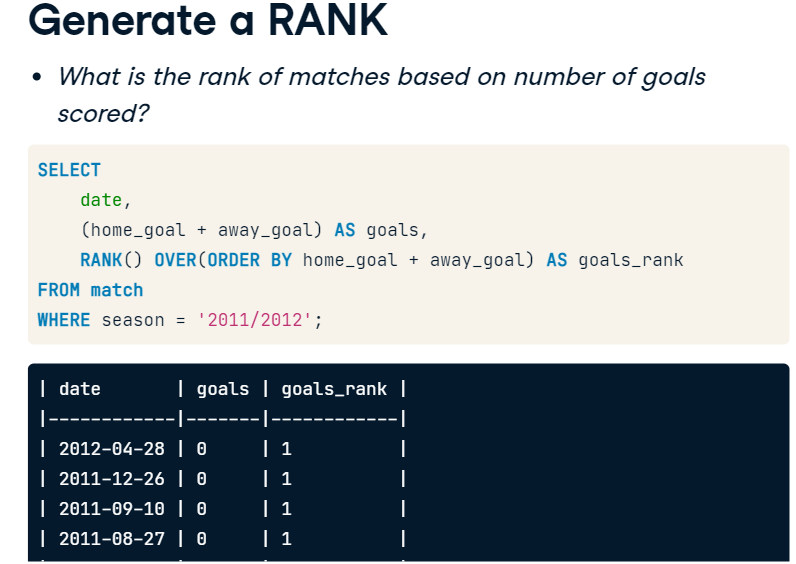
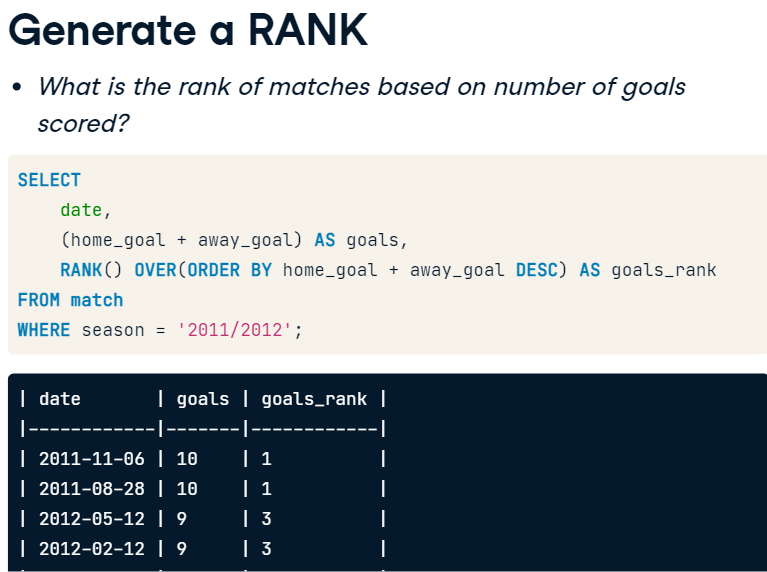
#### OVER
The OVER() clause allows you to pass an aggregate function down a data set, similar to subqueries in SELECT. The OVER() clause offers significant benefits over subqueries in select -- namely, your queries will run faster, and the OVER() clause has a wide range of additional functions and clauses you can include with it that we will cover later on in this chapter.


- Select the match ID, country name, season, home, and away goals from the match and country tables.
- Complete the query that calculates the average number of goals scored overall and then includes the aggregate value in each row using a window function.


```sql
SELECT 
	-- Select the id, country name, season, home, and away goals
	m.id, 
    c.name AS country, 
    m.season,
	m.home_goal,
	m.away_goal,
    -- Use a window to include the aggregate average in each row
	AVG(m.home_goal + m.away_goal) OVER() AS overall_avg
FROM match AS m
LEFT JOIN country AS c ON m.country_id = c.id;
```

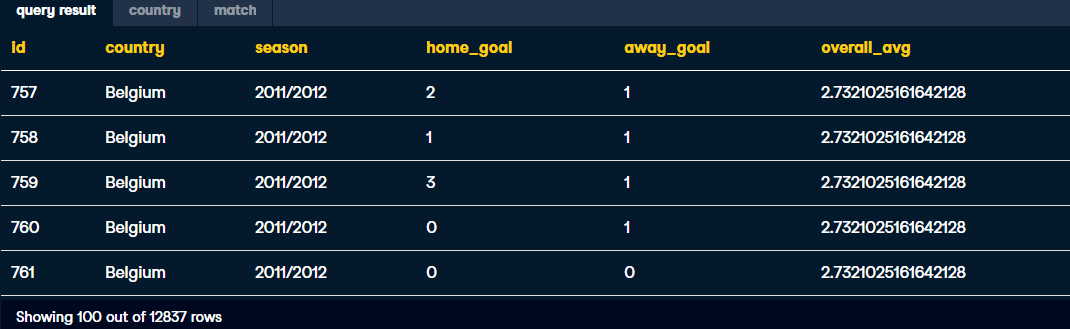

#### What's OVER here?
Window functions allow you to create a RANK of information according to any variable you want to use to sort your data. When setting this up, you will need to specify what column/calculation you want to use to calculate your rank. This is done by including an ORDER BY clause inside the OVER() clause. Below is an example:
```sql
SELECT 
    id,
    RANK() OVER(ORDER BY home_goal) AS rank
FROM match;
```

- Select the league name and average total goals scored from league and match.
- Complete the window function so it calculates the rank of average goals scored across all leagues in the database.
- Order the rank by the average total of home and away goals scored.

```sql
SELECT 
	-- Select the league name and average goals scored
	l.name AS league,
    AVG(m.home_goal + m.away_goal) AS avg_goals,
    -- Rank each league according to the average goals
    RANK() OVER(ORDER BY AVG(m.home_goal + m.away_goal)) AS league_rank
FROM league AS l
LEFT JOIN match AS m 
ON l.id = m.country_id
WHERE m.season = '2011/2012'
GROUP BY l.name
-- Order the query by the rank you created
ORDER BY league_rank;
```
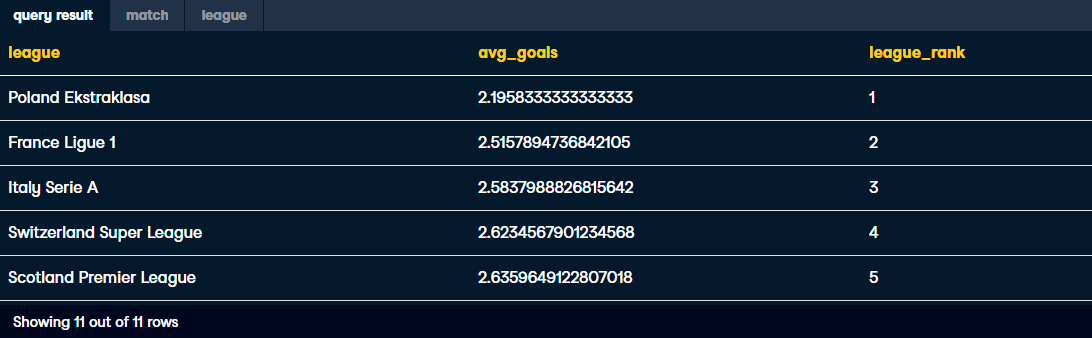

#### Flip OVER your results
In the last exercise, the rank generated in your query was organized from smallest to largest. By adding DESC to your window function, you can create a rank sorted from largest to smallest.
```sql
SELECT 
    id,
    RANK() OVER(ORDER BY home_goal DESC) AS rank
FROM match;
```

- Complete the same parts of the query as the previous exercise.
- Complete the window function to rank each league from highest to lowest average goals scored.
- Order the main query by the rank you just created.

```sql
SELECT 
	-- Select the league name and average goals scored
	l.name AS league,
    AVG(m.home_goal + m.away_goal) AS avg_goals,
    -- Rank leagues in descending order by average goals
    RANK() OVER(ORDER BY AVG(m.home_goal + m.away_goal) DESC) AS league_rank
FROM league AS l
LEFT JOIN match AS m 
ON l.id = m.country_id
WHERE m.season = '2011/2012'
GROUP BY l.name
-- Order the query by the rank you created
ORDER BY league_rank;
```

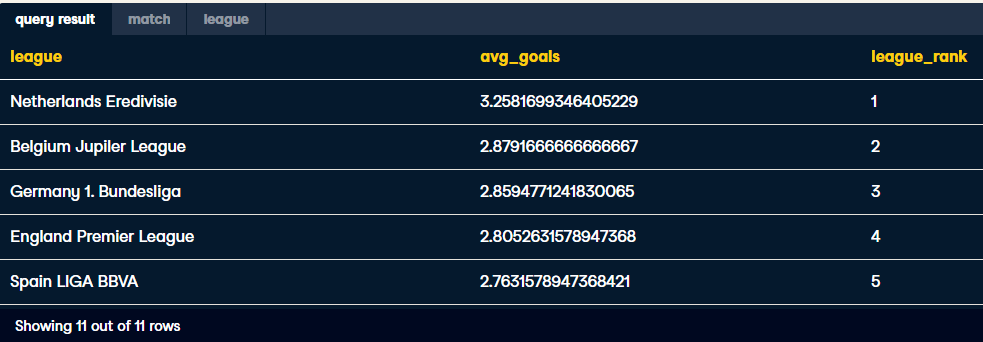

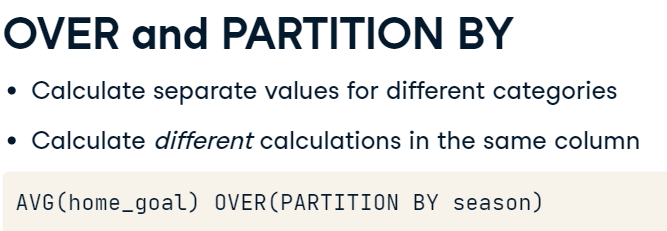

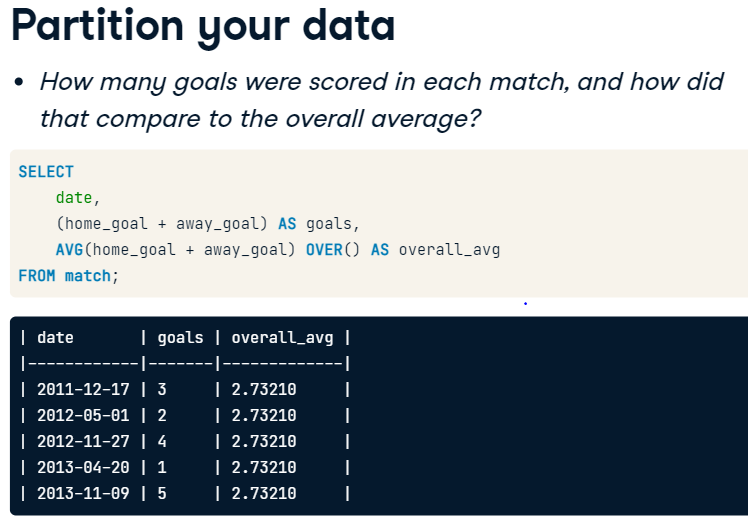

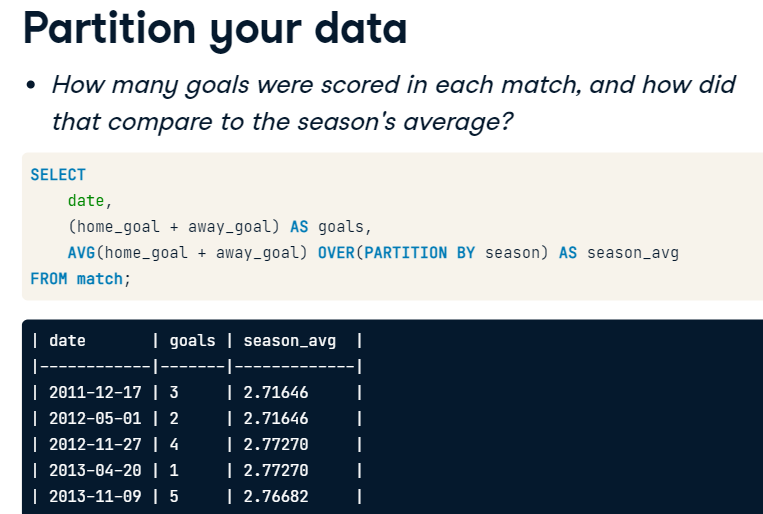

#### PARTITION BY a column
The PARTITION BY clause allows you to calculate separate "windows" based on columns you want to divide your results. For example, you can create a single column that calculates an overall average of goals scored for each season.

In this exercise, you will be creating a data set of games played by Legia Warszawa (Warsaw League), the top ranked team in Poland, and comparing their individual game performance to the overall average for that season.

Where do you see more outliers? Are they Legia Warszawa's home or away games?


- Complete the two window functions that calculate the home and away goal averages. Partition the window functions by season to calculate separate averages for each season.
- Filter the query to only include matches played by Legia Warszawa, id = 8673.

```sql
SELECT 
	date,
	season,
    home_goal,
    away_goal,
    CASE WHEN hometeam_id = 8673 THEN 'home' 
         ELSE 'away' END AS warsaw_location,
    -- Calculate the average goals scored partitioned by season
    AVG(home_goal) OVER(PARTITION BY season) AS season_homeavg,
    AVG(away_goal) OVER(PARTITION BY season) AS season_awayavg
FROM match
-- Filter the data set for Legia Warszawa matches only
WHERE 
	hometeam_id = 8673 
    OR awayteam_id = 8673
ORDER BY (home_goal + away_goal) DESC;
```
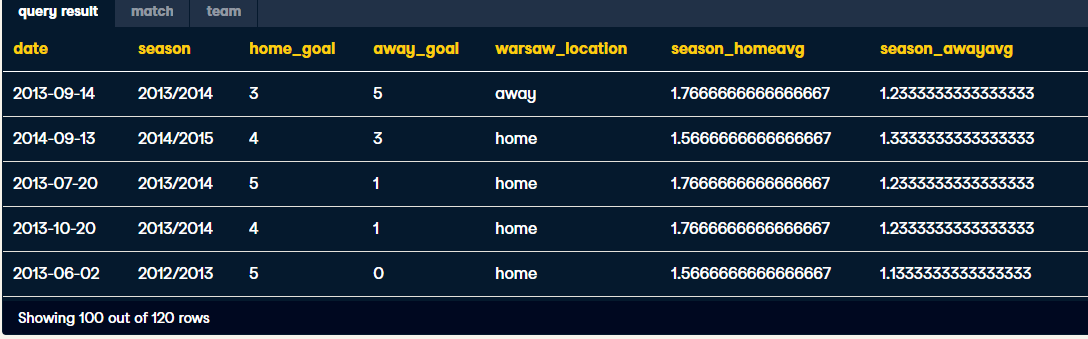
#### PARTITION BY multiple columns
The PARTITION BY clause can be used to break out window averages by multiple data points (columns). You can even calculate the information you want to use to partition your data! For example, you can calculate average goals scored by season and by country, or by the calendar year (taken from the date column).


- Construct two window functions partitioning the average of home and away goals by season and month.
- Filter the data set by Legia Warszawa's team ID (8673) so that the window calculation excludes all teams who did not play against them.


```sql
SELECT 
	date,
    season,
    home_goal,
    away_goal,
    CASE WHEN hometeam_id = 8673 THEN 'home' 
         ELSE 'away' END AS warsaw_location,
    -- Calculate average goals partitioned by season and month
    AVG(home_goal) OVER(PARTITION BY season, 
         	EXTRACT(MONTH FROM date)) AS season_mo_home,
    AVG(away_goal) OVER(PARTITION BY season, 
            EXTRACT(MONTH FROM date)) AS season_mo_away
FROM match
WHERE 
	hometeam_id = 8673 
    OR awayteam_id = 8673
ORDER BY (home_goal + away_goal) DESC;
```

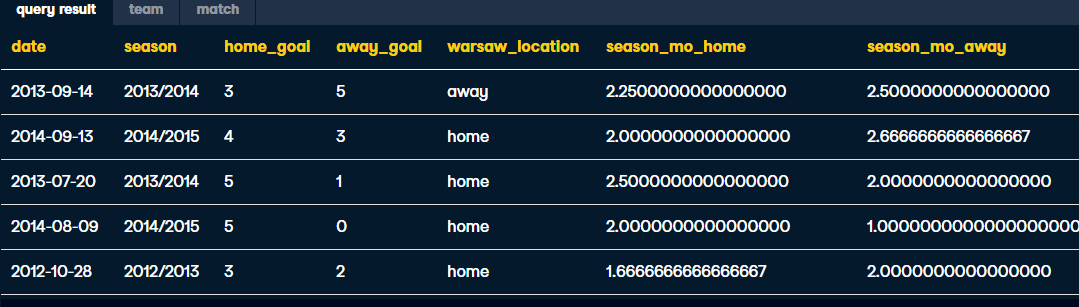
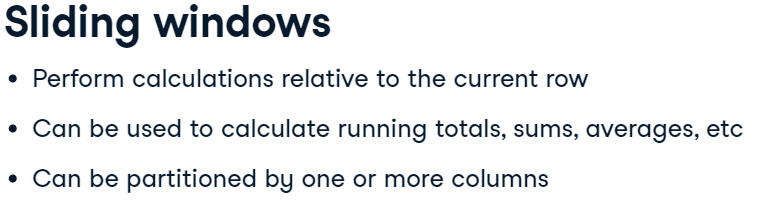
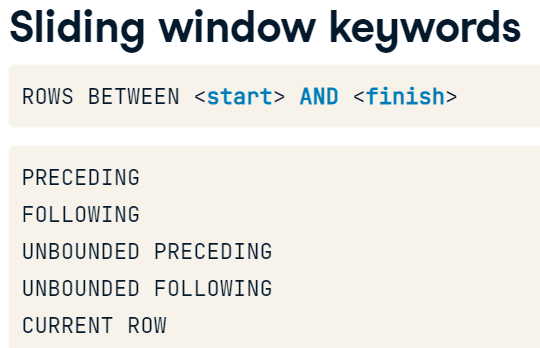
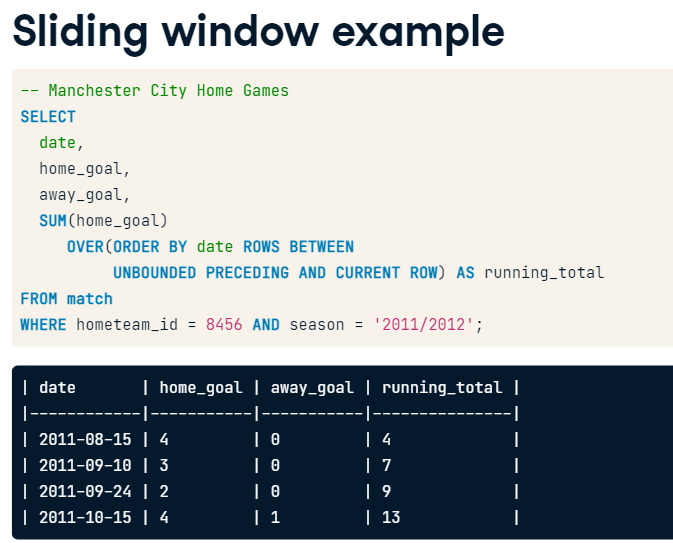
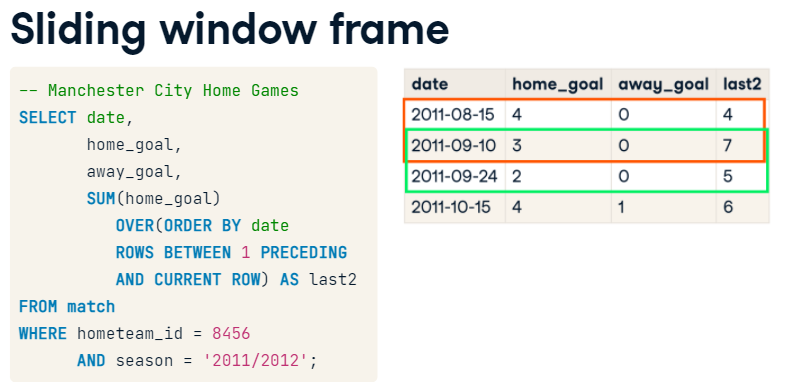
#### Slide to the left
Sliding windows allow you to create running calculations between any two points in a window using functions such as PRECEDING, FOLLOWING, and CURRENT ROW. You can calculate running counts, sums, averages, and other aggregate functions between any two points you specify in the data set.

In this exercise, you will expand on the examples discussed in the video, calculating the running total of goals scored by the FC Utrecht when they were the home team during the 2011/2012 season. Do they score more goals at the end of the season as the home or away team?


- Complete the window function by:
- Assessing the running total of home goals scored by FC Utrecht.
- Assessing the running average of home goals scored.
- Ordering both the running average and running total by date.

```sql
SELECT 
	date,
	home_goal,
	away_goal,
    -- Create a running total and running average of home goals
	SUM(home_goal) OVER(ORDER BY date 
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_total,
    AVG(home_goal) OVER(ORDER BY date 
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_avg
FROM match
WHERE 
	hometeam_id = 9908 
    AND season = '2011/2012';
```
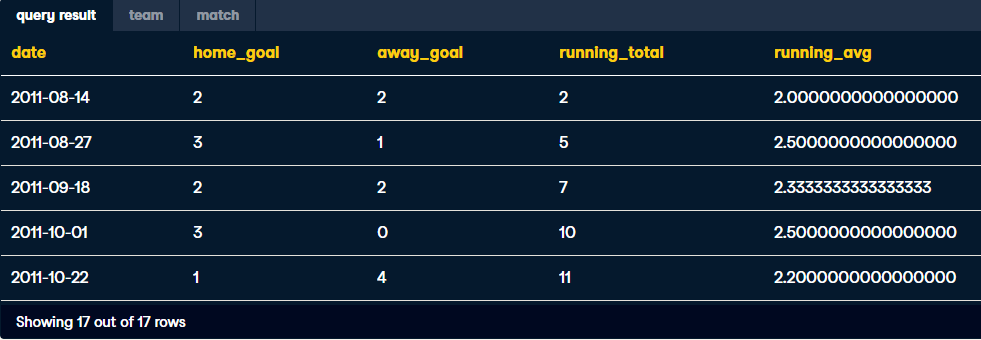

#### Slide to the right
Now let's see how FC Utrecht performs when they're the away team. You'll notice that the total for the season is at the bottom of the data set you queried. Depending on your results, this could be pretty long, and scrolling down is not very helpful.

In this exercise, you will slightly modify the query from the previous exercise by sorting the data set in reverse order and calculating a backward running total from the CURRENT ROW to the end of the data set (earliest record).


- Complete the window function by:
- Assessing the running total of home goals scored by FC Utrecht.
- Assessing the running average of home goals scored.
- Ordering both the running average and running total by date, descending.


```sql
SELECT 
	-- Select the date, home goal, and away goals
	date,
	home_goal,
	away_goal,
    -- Create a running total and running average of home goals
    SUM(home_goal) OVER(ORDER BY date DESC
        ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS running_total,
    AVG(home_goal) OVER(ORDER BY date DESC
        ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS running_avg
FROM match
WHERE 
	awayteam_id = 9908 
    AND season = '2011/2012';
```
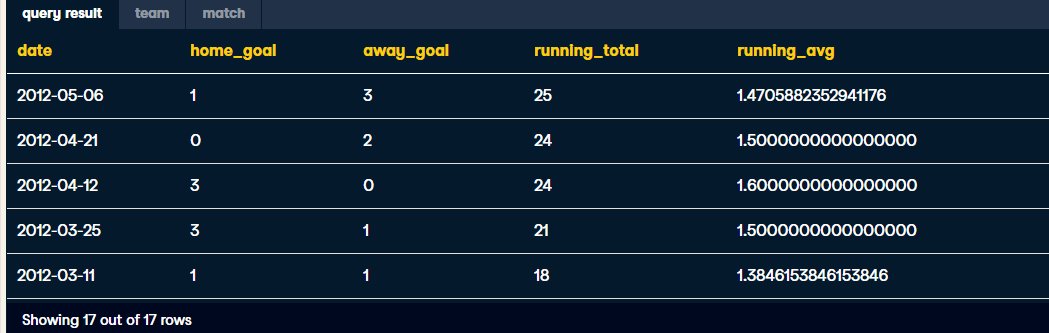
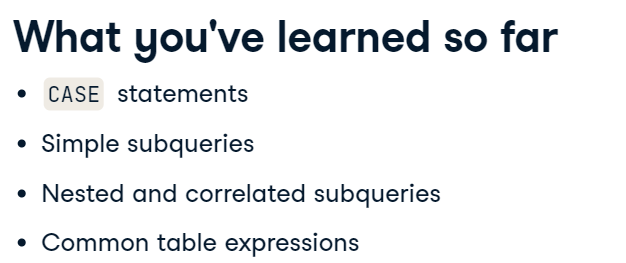
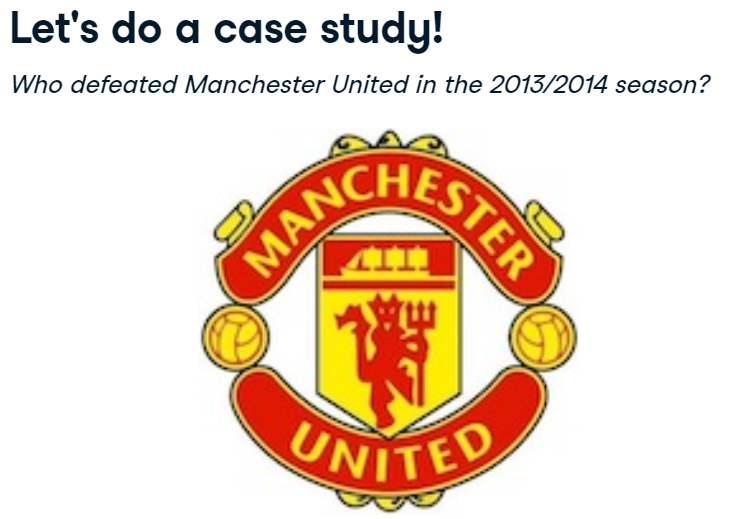
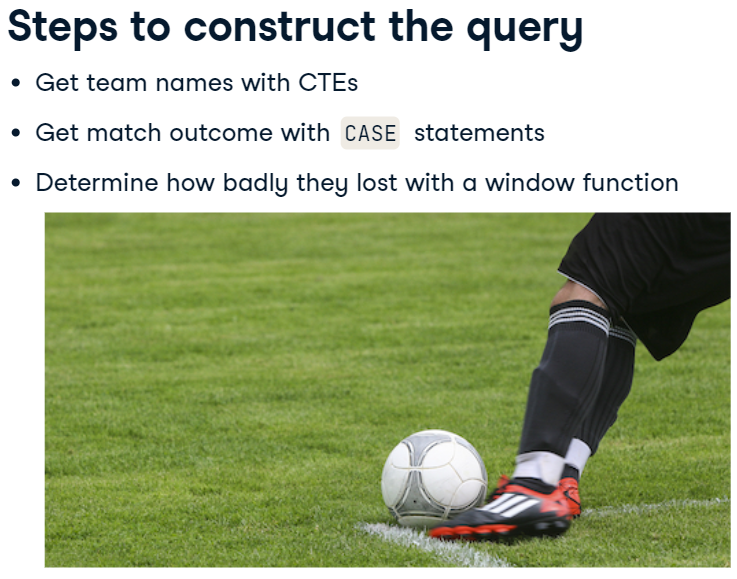
#### Setting up the home team CTE
In this course, we've covered ways in which you can use CASE statements, subqueries, common table expressions, and window functions in your queries to structure a data set that best meets your needs. For this exercise, you will be using all of these concepts to generate a list of matches in which Manchester United was defeated during the 2014/2015 English Premier League season.

Your first task is to create the first query that filters for matches where Manchester United played as the home team. This will become a common table expression in a later exercise.


- Create a CASE statement that identifies each match as a win, lose, or tie for Manchester United.
- Fill out the logical operators for each WHEN clause in the CASE statement (equals, greater than, less than).
- Join the tables on home team ID from match, and team_api_id from team.
- Filter the query to only include games from the 2014/2015 season where Manchester United was the home team.


```sql
SELECT 
    m.id, 
	t.team_long_name,
    -- Identify matches as home/away wins or ties
	CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
		 WHEN m.home_goal < m.away_goal THEN 'MU Loss' 
         ELSE 'Tie' END AS outcome
FROM match AS m
-- Left join team on the home team ID and team API id
LEFT JOIN team AS t 
ON m.hometeam_id = t.team_api_id
WHERE 
	-- Filter for 2014/2015 and Manchester United as the home team
	m.season = '2014/2015'
	AND t.team_long_name = 'Manchester United';
```
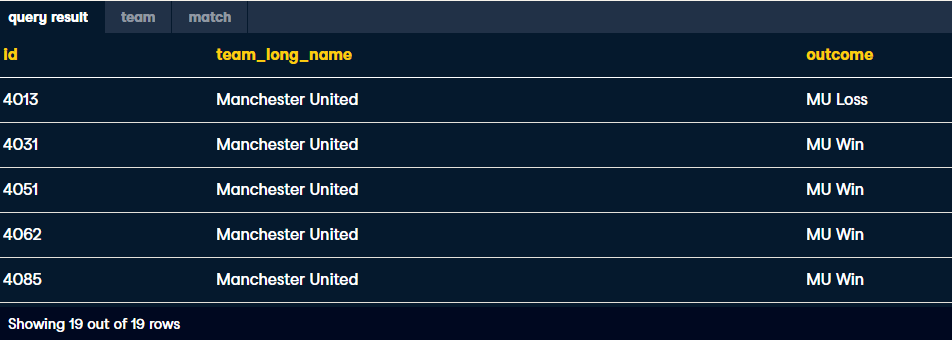
#### Setting up the away team CTE
Great job! Now that you have a query identifying the home team in a match, you will perform a similar set of steps to identify the away team. Just like the previous step, you will join the match and team tables. Each of these two queries will be declared as a Common Table Expression in the following step.

The primary difference in this query is that you will be joining the tables on awayteam_id, and reversing the match outcomes in the CASE statement.

When altering CASE statement logic in your own work, you can reverse either the logical condition (i.e., home_goal > away_goal) or the outcome in THEN -- just make sure you only reverse one of the two!

- Complete the CASE statement syntax.
- Fill out the logical operators identifying each match as a win, loss, or tie for Manchester United.
- Join the table on awayteam_id, and team_api_id.

```sql
SELECT 
    m.id, 
	t.team_long_name,
    -- Identify matches as home/away wins or ties
	CASE WHEN m.home_goal > m.away_goal THEN 'MU Loss'
		 WHEN m.home_goal < m.away_goal THEN 'MU Win' 
         ELSE 'Tie' END AS outcome
-- Join team table to the match table
FROM match AS m
LEFT JOIN team AS t 
ON m.awayteam_id = t.team_api_id
WHERE 
	-- Filter for 2014/2015 and Manchester United as the away team
	m.season = '2014/2015'
	AND t.team_long_name = 'Manchester United';
```
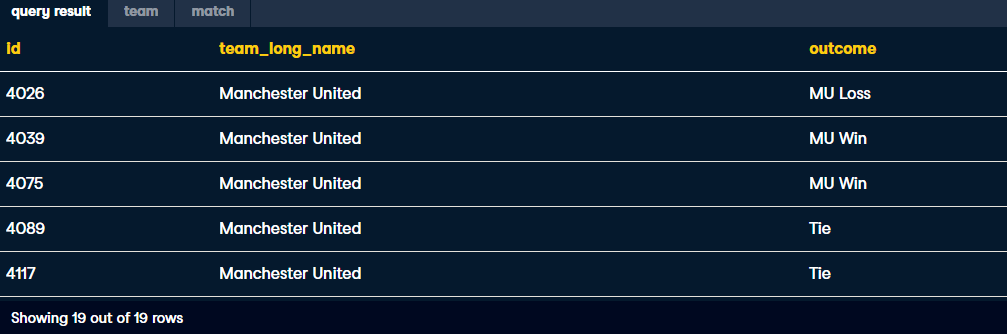
##### Putting the CTEs together
Now that you've created the two subqueries identifying the home and away team opponents, it's time to rearrange your query with the home and away subqueries as Common Table Expressions (CTEs). You'll notice that the main query includes the phrase, SELECT DISTINCT. Without identifying only DISTINCT matches, you will return a duplicate record for each game played.

Continue building the query to extract all matches played by Manchester United in the 2014/2015 season.


- Declare the home and away CTEs before your main query.
- Join your CTEs to the match table using a LEFT JOIN.
- Select the relevant data from the CTEs into the main query.
- Select the date from match, team names from the CTEs, and home/ away goals from match in the main query.

```sql
-- Set up the home team CTE
WITH home AS (
  SELECT m.id, t.team_long_name,
	  CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
		   WHEN m.home_goal < m.away_goal THEN 'MU Loss' 
  		   ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.hometeam_id = t.team_api_id),
-- Set up the away team CTE
away AS (
  SELECT m.id, t.team_long_name,
	  CASE WHEN m.home_goal > m.away_goal THEN 'MU Loss'
		   WHEN m.home_goal < m.away_goal THEN 'MU Win' 
  		   ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.awayteam_id = t.team_api_id)
-- Select team names, the date and goals
SELECT DISTINCT
    m.date,
    home.team_long_name AS home_team,
    away.team_long_name AS away_team,
    m.home_goal, m.away_goal
-- Join the CTEs onto the match table
FROM match AS m
LEFT JOIN home ON m.id = home.id
LEFT JOIN away ON m.id = away.id
WHERE m.season = '2014/2015'
      AND (home.team_long_name = 'Manchester United' 
           OR away.team_long_name = 'Manchester United');
```

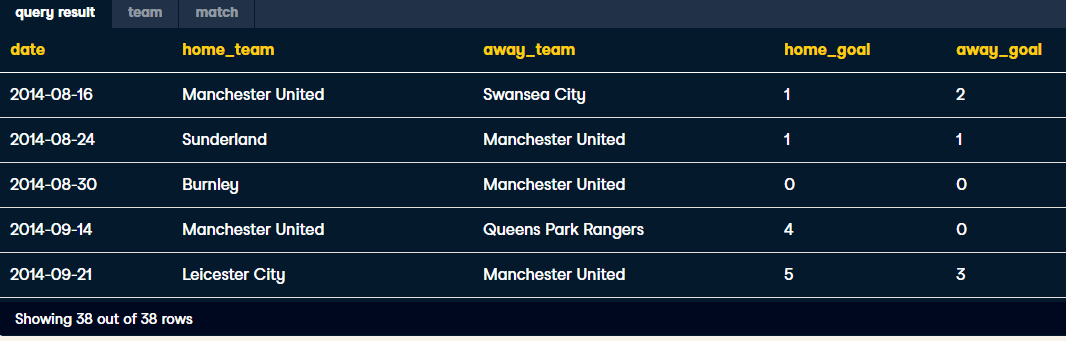

#### Add a window function
Fantastic! You now have a result set that retrieves the match date, home team, away team, and the goals scored by each team. You have one final component of the question left -- how badly did Manchester United lose in each match?

In order to determine this, let's add a window function to the main query that ranks matches by the absolute value of the difference between home_goal and away_goal. This allows us to directly compare the difference in scores without having to consider whether Manchester United played as the home or away team!

The equation is complete for you -- all you need to do is properly complete the window function!


- Set up the CTEs so that the home and away teams each have a name, ID, and score associated with them.
- Select the date, home team name, away team name, home goal, and away goals scored in the main query.
- Rank the matches and order by the difference in scores in descending order.
           
```sql
-- Set up the home team CTE
WITH home AS (
  SELECT m.id, t.team_long_name,
	  CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
		   WHEN m.home_goal < m.away_goal THEN 'MU Loss' 
  		   ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.hometeam_id = t.team_api_id),
-- Set up the away team CTE
away AS (
  SELECT m.id, t.team_long_name,
	  CASE WHEN m.home_goal > m.away_goal THEN 'MU Loss'
		   WHEN m.home_goal < m.away_goal THEN 'MU Win' 
  		   ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.awayteam_id = t.team_api_id)
-- Select columns and and rank the matches by date
SELECT DISTINCT
    m.date,
    home.team_long_name AS home_team,
    away.team_long_name AS away_team,
    m.home_goal, m.away_goal,
    RANK() OVER(ORDER BY ABS(home_goal - away_goal) DESC) as match_rank
-- Join the CTEs onto the match table
FROM match AS m
LEFT JOIN home ON m.id = home.id
LEFT JOIN AWAY ON m.id = away.id
WHERE m.season = '2014/2015'
	  AND ((home.team_long_name = 'Manchester United' AND home.outcome = 'MU Loss')
	  OR (away.team_long_name = 'Manchester United' AND away.outcome = 'MU Loss'));
```
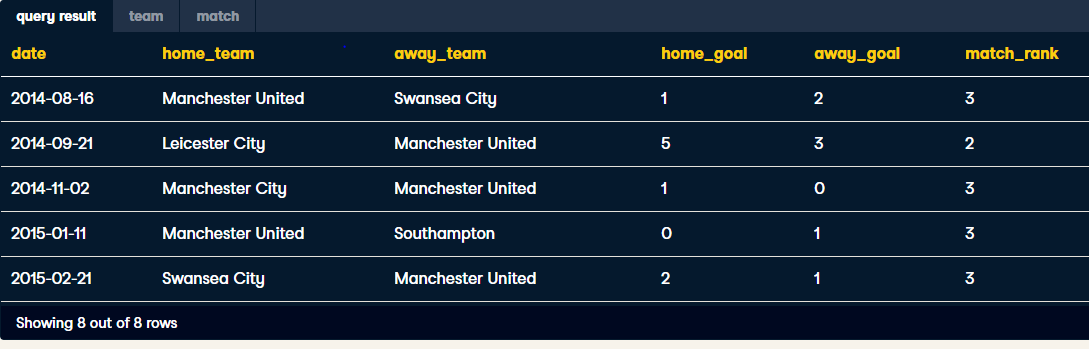
